#### 문제 1
문자 A는 숫자 1, 문자 B는 숫자 2 등으로 대응한다고 가정해 보자. 사용자로부터 정수 두 개를 입력받고 이들 정수와 대응하는 두 개 문자 사이의 모든 알파벳 문자를 출력하는 파이썬 프로그램을 작성하시오. 데이터 입력의 유효성을 검사해야 하며, 사용자가 숫자가 아닌 값, 음수값, 혹은 26보다 큰 값을 입력했을 대는 오류 메시지를 출력한다. 프로그램이 정확하게 동작하도록 하기 위해서 어떤 정수가 작은 값인지에 상관없이 필요하다면 입력한 두 정수값을 맞바꾸어 적당한 순서가 되도록 만든다.

In [2]:
# 사용자로부터 정수2개 입력받기
a, b = input("정수 두개를 입력하세요: ").split()

# 데이터 유효성 검사
if a[0]=='-' or b[0]=='-':
    print("데이터 유효하지 않음: 음수입니다")
elif a.isdigit()==False or b.isdigit()==False:
    print("데이터 유효하지 않음: 숫자가 아닙니다")
elif int(a)>26 or int(b)>26:
    print("데이터 유효하지 않음: 26보다 큰 값")
elif a == '0' or b=='0':
    print("데이터 유효하지 않음: 0값")
else:
    i = int(min(a,b))
    j = int(max(a,b))

    # 정수대응 알파벳 출력
    for x in range(i,j+1):
        print(chr(64+x),end=' ')

정수 두개를 입력하세요: 3 6
C D E F 

#### 코드설명
1. 사용자로부터 정수 2개 입력받기     
input함수를 이용해서 사용자로 부터 값을 입력받는다.    

2. 데이터 유효성 검사    
음수, 숫자가 아닌 값, 26보다 큰값들을 검사한다. 문제에는 없지만 0또한 유효성검사에서 걸러지도록 하였다.    

3. 정수대응 알파벳 출력    
위의 데이터 유효성 검사에서 통과한 경우, 정수형으로 변환한 시작할 작은 값인 i와 마지막 값인j를 설정한다.
반복문을 돌면서 숫자를 문자형으로 바꾸어 출력한다.

#### 문제 2
주간 급여는 한 주 동안 일한 총 시간과 시간당 임금으로 계산된다. 한 주 동안 일한 시간 중 40시간 초과 시간에 대해서는 1.5배의 임금을 받는다. 첨부된 p2data.csv 파일에는 각 사람의 이름과 시간당 임금 한 주의 요일 별 근무 시간이 다음과 같이 저장되어 있다. (rate이 시간당 임금을 말함)    
다음을 계산하고 출력하는 프로그램을 작성하시오. (pandas DataFrame 혹은 Series를 이용하시오.)     
- 각 사람의 이름과 총 근무 시간, 총 급여, 하루 평균 급여    
- 주간 근무 시간이 초과한 사람의 이름
- 10명의 총 근무 시간이 가장 많은/적은 요일과 그 때의 근무 시간
- 요일 별 근무 시간의 합계를 나타낸 바 그래프

     name  workHours    salary    dayPay
0   James         38  380000.0   76000.0
1     Bob         44  506000.0  101200.0
2   Henry         40  360000.0   72000.0
3   Alice         38  456000.0   91200.0
4     Tom         40  400000.0   80000.0
5    John         39  429000.0   85800.0
6  Silvia         39  390000.0   78000.0
7    Sean         40  360000.0   72000.0
8  George         41  498000.0   99600.0
9    Nick         34  442000.0   88400.0

     name
1     Bob
8  George

총 근무시간이 가장 많은 요일은 Mon이고, 이때의 근무시간은 84입니다
총 근무시간이 가장 적은 요일은 Tue이고, 이때의 근무시간은 74입니다


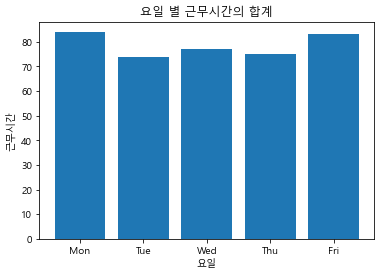

In [69]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rc

# 파일 불러오기 
data = pd.read_csv("./p2data.csv")
frame = pd.DataFrame(data,columns=['name','workHours','salary','dayPay','rate'])

# 총 근무시간
frame['workHours'] = data[['Mon','Tue','Wed','Thu','Fri']].sum(axis=1)
 
# 총 급여
frame['salary'] = frame.apply(lambda x: (40*x['rate'])+((x['workHours']-40)*(x['rate']*1.5))
                             if (x['workHours']>40)
                             else x['workHours']*x['rate'], axis=1)
# 하루평균 급여
frame['dayPay'] = frame['salary'].div(5)
del frame['rate']
print(frame)
print()

# 주간 근무시간이 초과한 사람의 이름
over = frame.loc[frame['workHours'] > 40, ['name']]
print(over)
print()

# 10명의 총 근무 시간이 가장 많/적은 요일 & 그 때의 근무 시간
day = data[['Mon','Tue','Wed','Thu','Fri']].sum(axis=0)
mx = day.max(axis=0)
mxi = day.idxmax(axis=0)
print(f'총 근무시간이 가장 많은 요일은 {mxi}이고, 이때의 근무시간은 {mx}입니다')

mn = day.min(axis=0)
mni = day.idxmin(axis=0)
print(f'총 근무시간이 가장 적은 요일은 {mni}이고, 이때의 근무시간은 {mn}입니다')

# 요일 별 근무시간의 합계를 나타낸 바 그래프
rc('font', family='Malgun Gothic')
x = ['Mon','Tue','Wed','Thu','Fri']
y = list(day)
plt.title('요일 별 근무시간의 합계')
plt.xlabel('요일')
plt.ylabel('근무시간')
plt.bar(x,y)
plt.show()

#### 코드설명
1. 각 사람의 이름과 총 근무 시간, 총 급여, 하루 평균 급여    
파일을 불러온 후 이름, 총 근무시간, 총 급여, 하루평균급여, rate가 있는 frame을 만든다.    
총 근무시간: 요일의 요소들끼리 더한다. sum이용     
총 급여: apply함수를 이용하여 40시간 초과일경우 초과시간에 1.5를 곱하고 초과되지 않았을 경우 그냥 rate랑 시간만 곱한값을 넣는다.    
하루평균급여: 위에서 구한 급여를 5로 나눈다.    

2. 주간 근무 시간이 초과한 사람의 이름     
일한 시간중 40시간이 넘은 사람들의 이름만 뽑아서 출력한다.    

3. 10명의 총 근무 시간이 가장 많은/적은 요일과 그 때의 근무 시간
총 근무시간을 구할때는 열의 기준으로 더했다면 이번에는 행을 기준으로 더한다. 그 후 min.idxmin,max,idxmax함수를 이용하여 구한다.    

4. 요일 별 근무 시간의 합계를 나타낸 바 그래프
matplotlib함수를 이용하여 막대그래프를 그린다.

#### 문제 3
2차원 리스트에서 최대값 원소와 그 값의 위치를 저장하는 Location 클래스를 설계하시오. 이 클래스는 최대값 저장을 위한 maxValue, 2차원 리스트 내에서 최대값 원소의 인덱스 저장을 위한 row, column을 private 데이터 필드로 갖고 있고 row와 column은 정수 타입, maxValue는 실수 타입이다. 각 변수에 대한 getter 메소드를 가진다. 2차원 리스트를 입력 인자로 받아서 최대값 원소의 값과 그 위치 인덱스를 저장하는 Location 객체를 생성하여 반환하는 다음 함수를 구현하시오. 

def locateLargest(a):

위 함수의 반환값은 Location 객체이다. 사용자로부터 2차원 리스트의 행과 열의 개수와 리스트의 값을 입력받고 위 함수를 이용하여 최대값 원소에 대한 Location 객체를 구한 후 이를 출력하는 프로그램을 작성하시오.

In [11]:
# Location 클래스
class Location:
    def __init__(self, mv,r,c):
        self.__maxValue = mv
        self.__row = r
        self.__column = c
    
    # getter매소드
    def getMaxValue(self):
        return self.__maxValue
    def getRow(self):
        return self.__row
    def getColumn(self):
        return self.__column
    
# 객체생성 반환함수
def locateLargest(a):
    mv = a[0][0]
    r,c=0,0
    for i in range(len(a)):
        for j in range(len(a[i])):
            if a[i][j] > mv:
                mv = a[i][j]
                r = i; c = j
    loc = Location(mv,r,c)
    return loc

# 2차원 리스트 입력받기
r,c = input("리스트의 행과 열의 개수를 입력하시오: ").split()
matrix = [[0 for col in range(int(c))] for row in range(int(r))]

for row in range(int(r)):
    matrix[row] = list(map(eval, input(f'{row}행을 입력하시오: ').split()))

locate = locateLargest(matrix)

print(f'최대값 원소의 위치는 ({locate.getRow()},{locate.getColumn()})이고, 최대값은 {locate.getMaxValue()}입니다.')

리스트의 행과 열의 개수를 입력하시오: 3 4
0행을 입력하시오: 23.5 35 2 10
1행을 입력하시오: 4.5 3 45 3.5
2행을 입력하시오: 35 44 5.5 12.6
최대값 원소의 위치는 (1,2)이고, 최대값은 45입니다.


#### 코드설명
1. 2차원 리스트 입력받기
먼저, 사용자로 부터 행과 열을 입력받고 이를 통해 n * m리스트를 초기화한다.    
for문을 돌며 행에 대한 입력값을 입력받고 이를 통해 리스트 값을 바꾼다.    
입력을 마친 2차원 리스트를 인자로 locateLargest함수를 호출한다.    

2. locateLargest함수    
입력받은 2차원 리스트를 매개변수로 받는다.    
mv,col,row값을 초기화 해놓고 반복문을 돌면서 값을 변환한다.    
그 값들을 인자로 Location 클래스에 보낸 후 객체를 반환한다.    

3. Location클래스
locateLargest함수에서 받은 매개변수를 getter매소드를 통해 얻을 수 있게한다.    

객체를 호출하며 최대값의 원소 위치와 최대값을 출력한다.    

#### 문제 4
2차원 리스트에 가로 또는 세로 방향으로 세 개의 동일한 숫자가 연이어 있는지 검사하는 다음의 함수를 작성하시오.     

def  consecutiveThree(values):     

사용자로부터 2차원 리스트의 행과 열의 개수와 리스트의 값을 입력받고 위 함수를 이용하여 세 개의 동일한 숫자가 연이어 존재하면 그 숫자를 출력하고, 그렇지 않으면 NA를 출력하는 프로그램을 작성하시오. 이러한 숫자는 하나만 있다고 가정한다.    

In [17]:
# 3개 연이은 동일 숫자 판별 함수
def consecutiveThree(values):
    cntI,num=0,0
    for i in range(len(values)):
        cntJ = 0
        if i+1 < len(values):
            for j in range(len(values[i])):
                if j+1< len(values):
                    if values[i][j]==values[i][j+1]:
                        cntJ+=1
                        if cntJ==2: num = values[i][j]
            if values[i][j]==values[i+1][j]:
                cntI+=1
                if cntI==2: num=values[i][j]
    if num==0: num='NA'
    return num
                
# 2차원 리스트 입력받기
r,c = input("리스트의 행과 열의 개수를 입력하시오: ").split()
matrix = [[0 for col in range(int(c))] for row in range(int(r))]

for row in range(int(r)):
    matrix[row] = list(map(eval, input(f'{row}행을 입력하시오: ').split()))

# 함수호출&출력
three = consecutiveThree(matrix)
print(three)

리스트의 행과 열의 개수를 입력하시오: 3 3
0행을 입력하시오: 5 3 2
1행을 입력하시오: 1 1 1
2행을 입력하시오: 3 4 1
1


#### 코드설명
1. 2차원리스트 입력받기    
위의 문제와 같이 사용자로부터 입력받은 행과 열로 2차원 리스트를 초기화한 후 입력받는 숫자로 배열값을 바꾼다.    

2. consecutiveThree 함수    
연속으로 동일한 3개의 숫자가 존재하려면 행또는 열의 값이 같아야한다.     
이를 구현하기 위해 이중반복문을 통해 i또는j값이 같은지 판별하고 같다면 각각의cnt를 증가시켜주었다. 3개가 같아졌을때 해당값을 num에 저장하고 num을 함수의 반환값으로 반환하도록 한다. 